# Level-2_Task-2

## Price Range Analysis
Determine the most common price range among all the restaurants.

Calculate the average rating for each price range.

Identify the color that represents the highest average rating among different price ranges.

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Dataset.csv')

In [4]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
most_common_price_range = data['Price range'].mode()[0]
print(f"The most common price range is: {most_common_price_range}")

The most common price range is: 1


In [6]:
average_rating_by_price = data.groupby('Price range')['Aggregate rating'].mean().reset_index()
print("Average rating for each price range:")
print(average_rating_by_price)

Average rating for each price range:
   Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918


In [7]:
# Calculate the average rating by price range
average_rating_by_price = data.groupby('Price range')['Aggregate rating'].mean().reset_index()

# Find the highest average rating and its associated price range
highest_avg_rating_color = average_rating_by_price.sort_values(by='Aggregate rating', ascending=False).iloc[0]

# Print the result
print("The price range with the highest average rating is:", highest_avg_rating_color['Price range'])
print("The highest average rating in this price range is:", highest_avg_rating_color['Aggregate rating'])

The price range with the highest average rating is: 4.0
The highest average rating in this price range is: 3.8179180887372017


In [8]:
table_booking_percentage = (data['Has Table booking'] == 'Yes').mean() * 100
online_delivery_percentage = (data['Has Online delivery'] == 'Yes').mean() * 100

print(f"\nPercentage of restaurants that offer table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants that offer online delivery: {online_delivery_percentage:.2f}%")


Percentage of restaurants that offer table booking: 12.12%
Percentage of restaurants that offer online delivery: 25.66%


In [9]:
avg_rating_with_table_booking = data[data['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table_booking = data[data['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(f"\nAverage rating for restaurants with table booking: {avg_rating_with_table_booking:.2f}")
print(f"Average rating for restaurants without table booking: {avg_rating_without_table_booking:.2f}")


Average rating for restaurants with table booking: 3.44
Average rating for restaurants without table booking: 2.56


In [10]:
online_delivery_by_price = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
print("\nAvailability of online delivery among restaurants with different price ranges:")
print(online_delivery_by_price)


Availability of online delivery among restaurants with different price ranges:
Has Online delivery        No       Yes
Price range                            
1                    0.842259  0.157741
2                    0.586894  0.413106
3                    0.708097  0.291903
4                    0.909556  0.090444


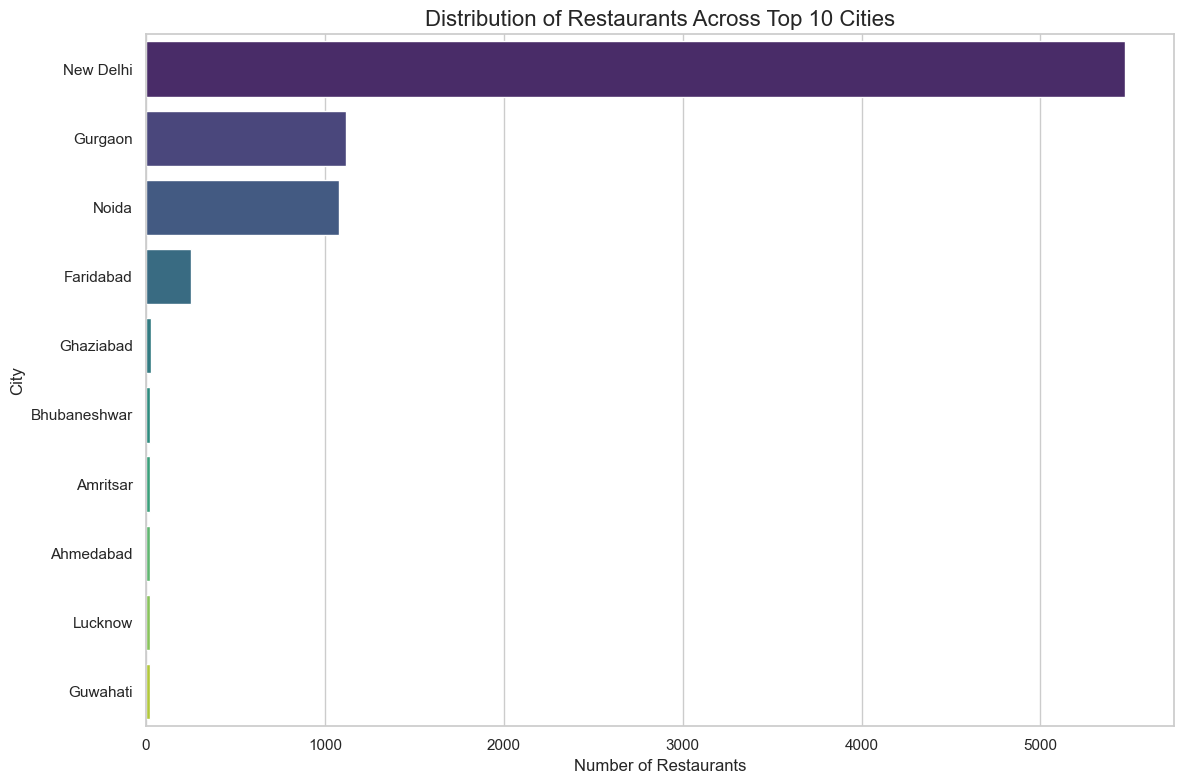

In [12]:
# Select the top 10 cities
top_10_cities = data['City'].value_counts().head(10).index

# Filter the data to include only the top 10 cities
data_top_10 = data[data['City'].isin(top_10_cities)]

# Set a pleasant style for the plot
sns.set(style="whitegrid")

# Create a figure and axes with specified size
plt.figure(figsize=(12, 8))

# Create the countplot
sns.countplot(y='City', data=data_top_10, order=top_10_cities, palette="viridis")

# Add title and labels
plt.title('Distribution of Restaurants Across Top 10 Cities', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


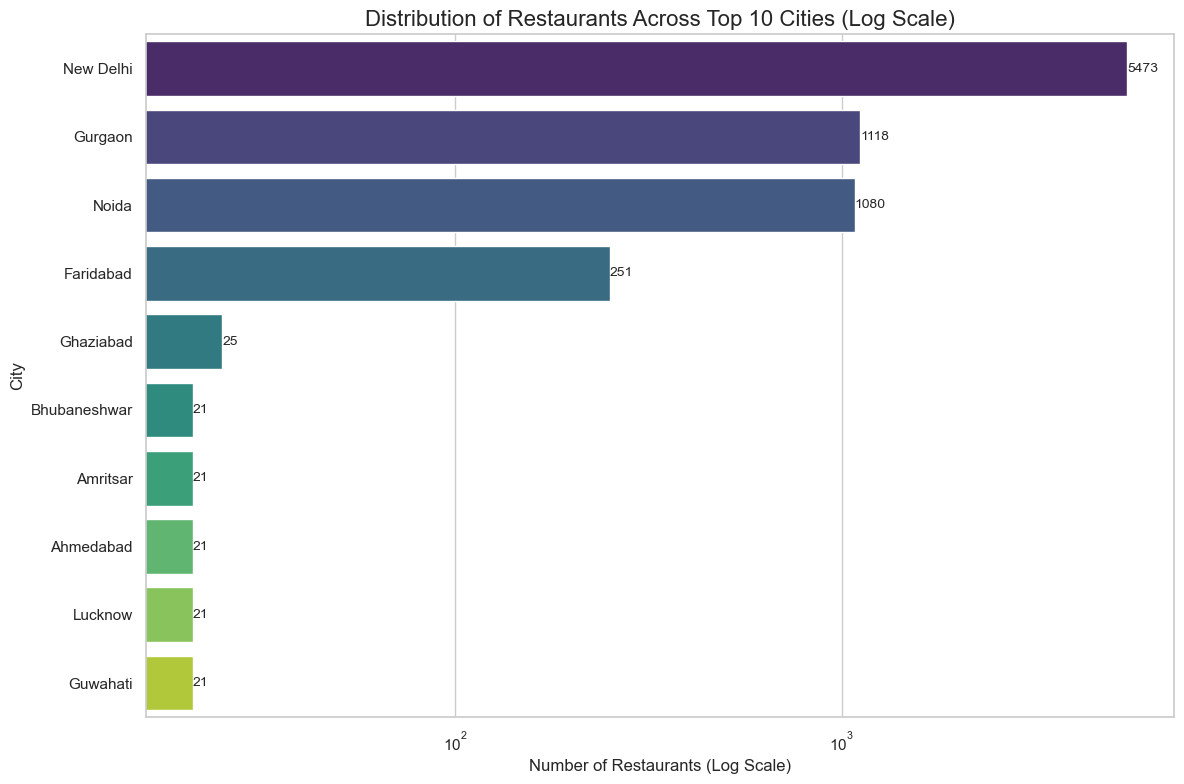

In [14]:
# Select the top 10 cities
top_10_cities = data['City'].value_counts().head(10).index

# Filter the data to include only the top 10 cities
data_top_10 = data[data['City'].isin(top_10_cities)]

# Set a pleasant style for the plot
sns.set(style="whitegrid")

# Create a figure and axes with specified size
plt.figure(figsize=(12, 8))

# Create the countplot with log scale on the x-axis
ax = sns.countplot(y='City', data=data_top_10, order=top_10_cities, palette="viridis")
ax.set_xscale("log")  # Set the x-axis to log scale

# Add title and labels
plt.title('Distribution of Restaurants Across Top 10 Cities (Log Scale)', fontsize=16)
plt.xlabel('Number of Restaurants (Log Scale)', fontsize=12)
plt.ylabel('City', fontsize=12)

# Display the number of restaurants on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha="left", va="center", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


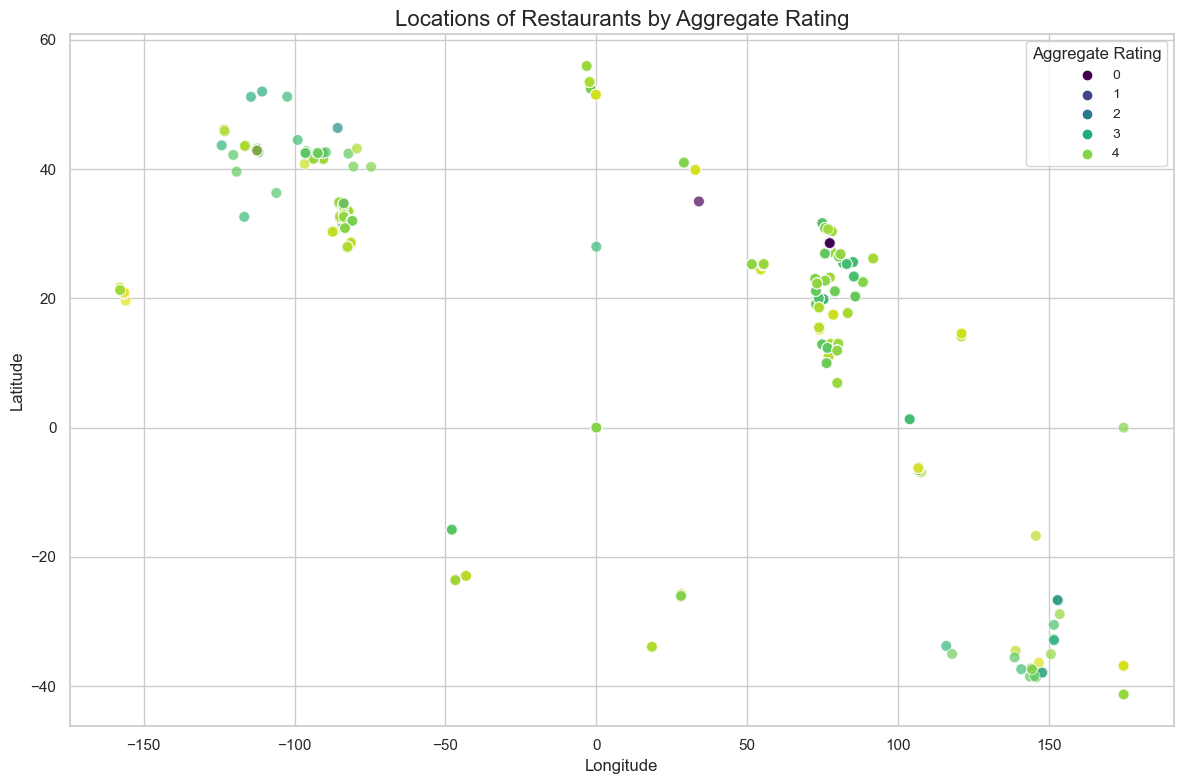

In [16]:
# Set a pleasant style for the plot
sns.set_style("whitegrid")

# Create a figure and axes with specified size
plt.figure(figsize=(12, 8))

# Create the scatter plot with enhanced aesthetics
sns.scatterplot(x='Longitude', y='Latitude', data=data, hue='Aggregate rating', palette='viridis', s=60, alpha=0.7)

# Set title and labels
plt.title('Locations of Restaurants by Aggregate Rating', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Customize legend
legend = plt.legend(title='Aggregate Rating', loc='upper right', fontsize=10)
legend.set_title('Aggregate Rating', prop={'size': 12})

# Show the plot
plt.tight_layout()
plt.show()

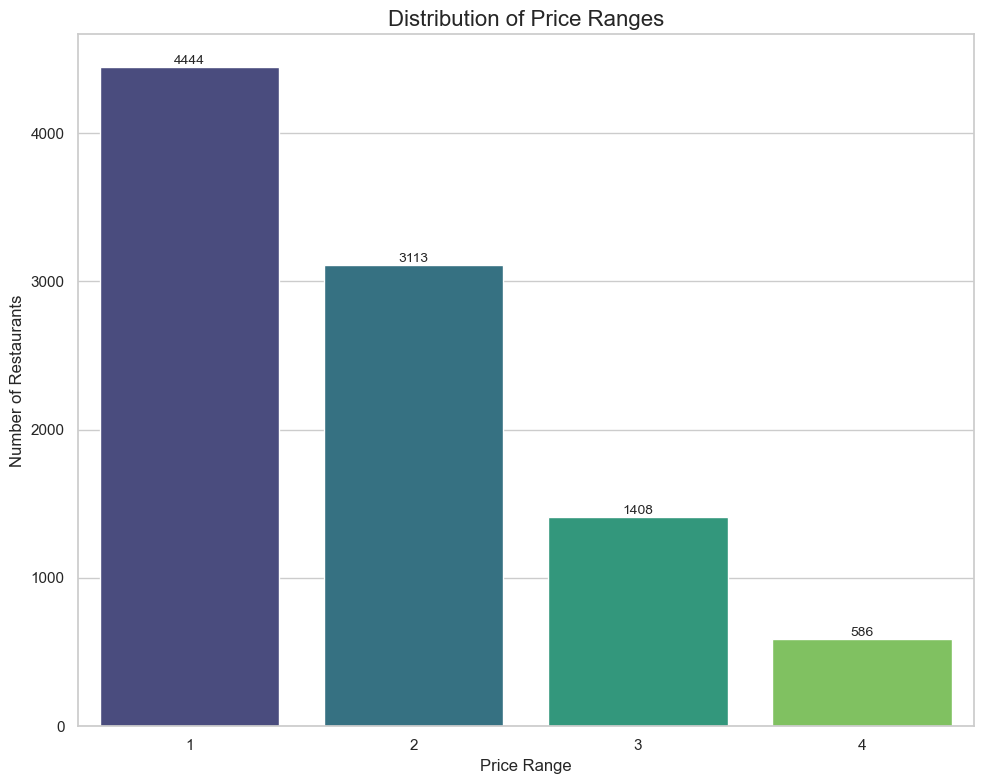

In [17]:
# Set a pleasant style for the plot
sns.set_style("whitegrid")

# Create a figure and axes with specified size
plt.figure(figsize=(10, 8))

# Create the countplot with enhanced aesthetics
ax = sns.countplot(x='Price range', data=data, palette='viridis')

# Set title and labels
plt.title('Distribution of Price Ranges', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)

# Customize the appearance of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

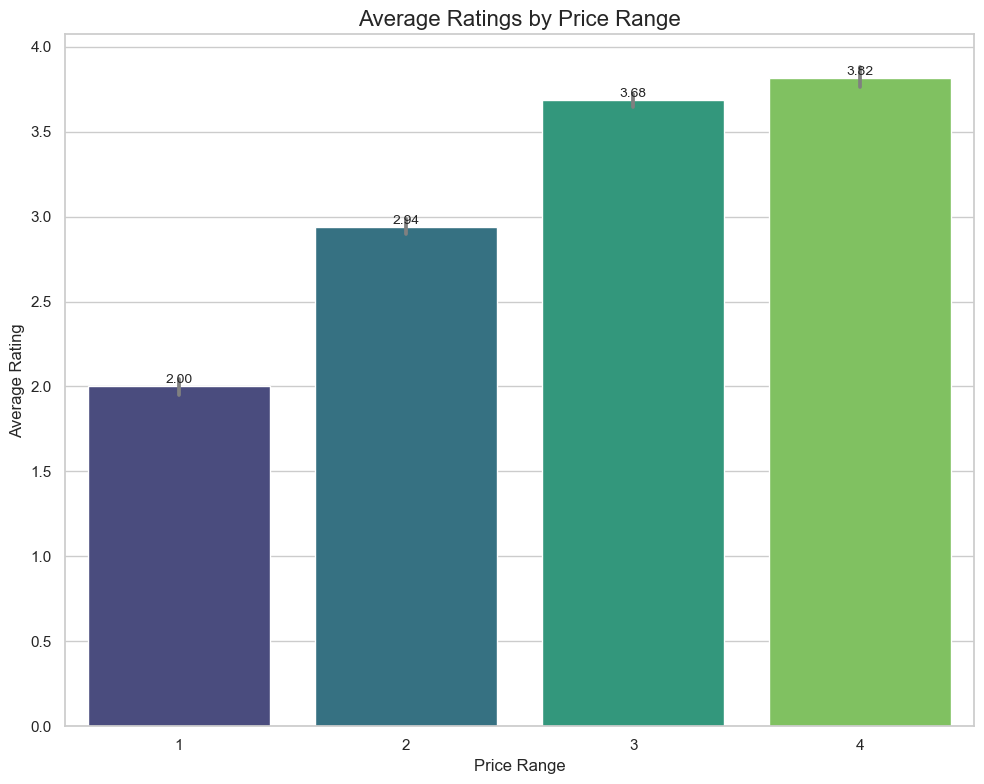

In [19]:
# Set a pleasant style for the plot
sns.set_style("whitegrid")

# Create a figure and axes with specified size
plt.figure(figsize=(10, 8))

# Create the barplot with enhanced aesthetics and no confidence intervals
ax = sns.barplot(x='Price range', y='Aggregate rating', data=data, palette='viridis', errcolor='gray')

# Set title and labels
plt.title('Average Ratings by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Customize the appearance of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

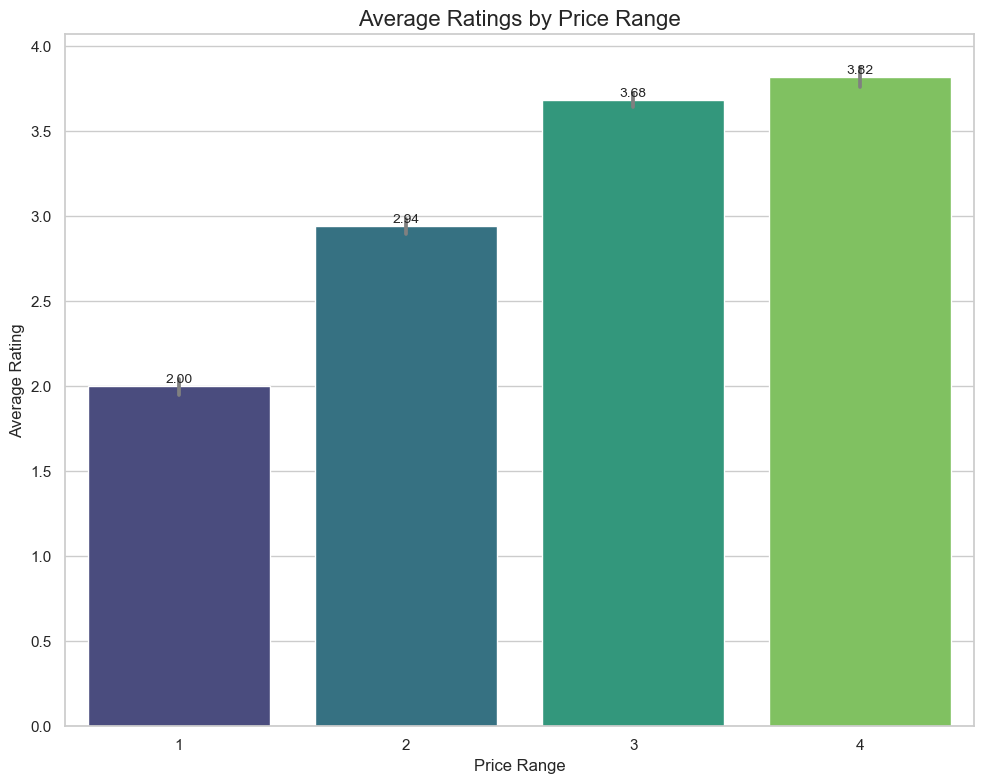

In [20]:
# Set a pleasant style for the plot
sns.set_style("whitegrid")

# Create a figure and axes with specified size
plt.figure(figsize=(10, 8))

# Create the barplot with enhanced aesthetics and no confidence intervals
ax = sns.barplot(x='Price range', y='Aggregate rating', data=data, palette='viridis', errcolor='gray')

# Set title and labels
plt.title('Average Ratings by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Customize the appearance of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()